In [16]:
#Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
#importing necessary modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [18]:
#importing the dataset and displaying first five rows of the dataframe
cancer_df = pd.read_csv("/content/gdrive/MyDrive/Cancer.csv")
cancer_df.head()

,countyCode,State,PovertyEst,povertyPercent,medIncome,Name,popEst2015,County,incidenceRate,avgAnnCount,recentTrend,fiveYearTrend,countyName,deathRate,avgDeathsPerYear,recTrend
0,1001,AL,7204,13.1,54366,Autauga County,55347,"Autauga County, Alabama(6,10)",475.0,266.0,stable,-0.5,"Autauga County, Alabama",178.3,99,falling
1,1003,AL,25696,13.0,49626,Baldwin County,203709,"Baldwin County, Alabama(6,10)",454.6,1072.0,stable,-1.3,"Baldwin County, Alabama",174.3,424,falling
2,1005,AL,5943,25.4,34971,Barbour County,26489,"Barbour County, Alabama(6,10)",477.5,155.0,stable,-1.4,"Barbour County, Alabama",192.7,62,falling
3,1007,AL,3666,18.1,39546,Bibb County,22583,"Bibb County, Alabama(6,10)",494.6,125.0,stable,3.3,"Bibb County, Alabama",212.4,53,stable
4,1009,AL,10000,17.5,45567,Blount County,57673,"Blount County, Alabama(6,10)",429.9,291.0,stable,-1.7,"Blount County, Alabama",175.4,120,falling


# Exploratory Data Analysis

In [19]:
#displaying the rows and columns of the dataset
cancer_df.shape

(3072, 16)

In [20]:
#displaying the columns of the dataset
cancer_df.columns

Index(['countyCode', 'State', 'PovertyEst', 'povertyPercent', 'medIncome',
       'Name', 'popEst2015', 'County', 'incidenceRate', 'avgAnnCount',
       'recentTrend', 'fiveYearTrend', 'countyName', 'deathRate',
       'avgDeathsPerYear', 'recTrend'],
      dtype='object')

In [21]:
#dropping the unnecessary columns

cancer_df = cancer_df.drop(['countyCode'], axis=1)
cancer_df.head()

,State,PovertyEst,povertyPercent,medIncome,Name,popEst2015,County,incidenceRate,avgAnnCount,recentTrend,fiveYearTrend,countyName,deathRate,avgDeathsPerYear,recTrend
0,AL,7204,13.1,54366,Autauga County,55347,"Autauga County, Alabama(6,10)",475.0,266.0,stable,-0.5,"Autauga County, Alabama",178.3,99,falling
1,AL,25696,13.0,49626,Baldwin County,203709,"Baldwin County, Alabama(6,10)",454.6,1072.0,stable,-1.3,"Baldwin County, Alabama",174.3,424,falling
2,AL,5943,25.4,34971,Barbour County,26489,"Barbour County, Alabama(6,10)",477.5,155.0,stable,-1.4,"Barbour County, Alabama",192.7,62,falling
3,AL,3666,18.1,39546,Bibb County,22583,"Bibb County, Alabama(6,10)",494.6,125.0,stable,3.3,"Bibb County, Alabama",212.4,53,stable
4,AL,10000,17.5,45567,Blount County,57673,"Blount County, Alabama(6,10)",429.9,291.0,stable,-1.7,"Blount County, Alabama",175.4,120,falling


In [22]:
#re-indexing the incidenceRate column

new_index = ['State', 'PovertyEst', 'povertyPercent', 'medIncome',
       'Name', 'popEst2015', 'County', 'avgAnnCount',
       'recentTrend', 'fiveYearTrend', 'countyName', 'deathRate',
       'avgDeathsPerYear', 'recTrend', 'incidenceRate']
cancer_df = cancer_df.reindex(new_index, axis=1)
cancer_df.head()

,State,PovertyEst,povertyPercent,medIncome,Name,popEst2015,County,avgAnnCount,recentTrend,fiveYearTrend,countyName,deathRate,avgDeathsPerYear,recTrend,incidenceRate
0,AL,7204,13.1,54366,Autauga County,55347,"Autauga County, Alabama(6,10)",266.0,stable,-0.5,"Autauga County, Alabama",178.3,99,falling,475.0
1,AL,25696,13.0,49626,Baldwin County,203709,"Baldwin County, Alabama(6,10)",1072.0,stable,-1.3,"Baldwin County, Alabama",174.3,424,falling,454.6
2,AL,5943,25.4,34971,Barbour County,26489,"Barbour County, Alabama(6,10)",155.0,stable,-1.4,"Barbour County, Alabama",192.7,62,falling,477.5
3,AL,3666,18.1,39546,Bibb County,22583,"Bibb County, Alabama(6,10)",125.0,stable,3.3,"Bibb County, Alabama",212.4,53,stable,494.6
4,AL,10000,17.5,45567,Blount County,57673,"Blount County, Alabama(6,10)",291.0,stable,-1.7,"Blount County, Alabama",175.4,120,falling,429.9


In [23]:
#checking for missing values
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3072 non-null   object 
 1   PovertyEst        3072 non-null   int64  
 2   povertyPercent    3072 non-null   float64
 3   medIncome         3072 non-null   int64  
 4   Name              3072 non-null   object 
 5   popEst2015        3072 non-null   int64  
 6   County            3072 non-null   object 
 7   avgAnnCount       3072 non-null   float64
 8   recentTrend       3072 non-null   object 
 9   fiveYearTrend     3072 non-null   object 
 10  countyName        3072 non-null   object 
 11  deathRate         3072 non-null   float64
 12  avgDeathsPerYear  3072 non-null   int64  
 13  recTrend          3072 non-null   object 
 14  incidenceRate     3072 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 360.1+ KB


In [24]:
#displaying data description using describe function
cancer_df.describe()

,PovertyEst,povertyPercent,medIncome,popEst2015,avgAnnCount,deathRate,avgDeathsPerYear,incidenceRate
count,3.072000e+03,3072.000000,3072.000000,3.072000e+03,3072.000000,3072.000000,3072.000000,3072.000000
mean,1.567978e+04,16.874935,47091.269206,1.045470e+05,612.505632,178.619954,187.769206,448.287419
std,5.614675e+04,6.407147,12079.964480,3.325959e+05,1422.851775,27.732254,506.491882,54.481622
min,9.100000e+01,3.200000,22640.000000,8.270000e+02,6.000000,59.700000,3.000000,201.300000
25%,1.889500e+03,12.175000,38876.250000,1.173900e+04,76.000000,161.200000,28.000000,420.475000
50%,4.435500e+03,15.900000,45201.000000,2.693200e+04,173.000000,178.150000,62.000000,453.550000
75%,1.086550e+04,20.400000,52509.250000,6.971500e+04,522.250000,195.200000,150.000000,480.900000
max,1.863025e+06,47.400000,125635.000000,1.017029e+07,38150.000000,362.800000,14010.000000,1206.900000


In [25]:
#displaying the data-types of the dataset to chcek if any categorical variables technically have numerical values and is significant. 
cancer_df.dtypes

State                object
PovertyEst            int64
povertyPercent      float64
medIncome             int64
Name                 object
popEst2015            int64
County               object
avgAnnCount         float64
recentTrend          object
fiveYearTrend        object
countyName           object
deathRate           float64
avgDeathsPerYear      int64
recTrend             object
incidenceRate       float64
dtype: object

We can see that the 'fiveYearTrend' attribute/feature has numeric values and hence it is significant for the model, let's convert it to numeric attribute. 



In [26]:
cancer_df['fiveYearTrend'].iloc[67:74]

67       *
68    -3.8
69    -7.8
70       1
71      -2
72       *
73    -8.2
Name: fiveYearTrend, dtype: object

As we can see above, some values have the value '*'. We need to replace these with 0 in order to be able to convert the feature column data-type to numeric. 

In [27]:
#replacing '*' values in the 'fiveYEarTrend' column with 0
cancer_df['fiveYearTrend'] = cancer_df['fiveYearTrend'].replace('*', 0)
cancer_df['fiveYearTrend'].iloc[67:73]

67       0
68    -3.8
69    -7.8
70       1
71      -2
72       0
Name: fiveYearTrend, dtype: object

In [28]:
#finally, converting the feature column data-type to numeric
cancer_df['fiveYearTrend'] = pd.to_numeric(cancer_df['fiveYearTrend'])
cancer_df.dtypes

State                object
PovertyEst            int64
povertyPercent      float64
medIncome             int64
Name                 object
popEst2015            int64
County               object
avgAnnCount         float64
recentTrend          object
fiveYearTrend       float64
countyName           object
deathRate           float64
avgDeathsPerYear      int64
recTrend             object
incidenceRate       float64
dtype: object

### Now, let's seperate the obejcte and the 

In [29]:
#seperating object varibales from the data
df_object = cancer_df.select_dtypes(include=['object'].copy())
df_object

,State,Name,County,recentTrend,countyName,recTrend
0,AL,Autauga County,"Autauga County, Alabama(6,10)",stable,"Autauga County, Alabama",falling
1,AL,Baldwin County,"Baldwin County, Alabama(6,10)",stable,"Baldwin County, Alabama",falling
2,AL,Barbour County,"Barbour County, Alabama(6,10)",stable,"Barbour County, Alabama",falling
3,AL,Bibb County,"Bibb County, Alabama(6,10)",stable,"Bibb County, Alabama",stable
4,AL,Blount County,"Blount County, Alabama(6,10)",stable,"Blount County, Alabama",falling
...,...,...,...,...,...,...
3067,WY,Sweetwater County,"Sweetwater County, Wyoming(6,10)",stable,"Sweetwater County, Wyoming",stable
3068,WY,Teton County,"Teton County, Wyoming(6,10)",stable,"Teton County, Wyoming",falling
3069,WY,Uinta County,"Uinta County, Wyoming(6,10)",stable,"Uinta County, Wyoming",falling
3070,WY,Washakie County,"Washakie County, Wyoming(6,10)",stable,"Washakie County, Wyoming",stable


In [30]:
#displaying correlation of variables
cancer_df.corr()

,PovertyEst,povertyPercent,medIncome,popEst2015,avgAnnCount,fiveYearTrend,deathRate,avgDeathsPerYear,incidenceRate
PovertyEst,1.000000,0.023237,0.116401,0.968736,0.888021,-0.032925,-0.084420,0.943291,0.013413
povertyPercent,0.023237,1.000000,-0.788888,-0.066251,-0.134784,0.028368,0.431158,-0.066806,0.008920
medIncome,0.116401,-0.788888,1.000000,0.238723,0.269430,-0.052230,-0.430815,0.224364,-0.002949
popEst2015,0.968736,-0.066251,0.238723,1.000000,0.926633,-0.038490,-0.123186,0.976884,0.023981
avgAnnCount,0.888021,-0.134784,0.269430,0.926633,1.000000,-0.007269,-0.144072,0.939702,0.071422
fiveYearTrend,-0.032925,0.028368,-0.052230,-0.038490,-0.007269,1.000000,0.055645,-0.039383,0.168755
deathRate,-0.084420,0.431158,-0.430815,-0.123186,-0.144072,0.055645,1.000000,-0.092433,0.447939
avgDeathsPerYear,0.943291,-0.066806,0.224364,0.976884,0.939702,-0.039383,-0.092433,1.000000,0.060647
incidenceRate,0.013413,0.008920,-0.002949,0.023981,0.071422,0.168755,0.447939,0.060647,1.000000


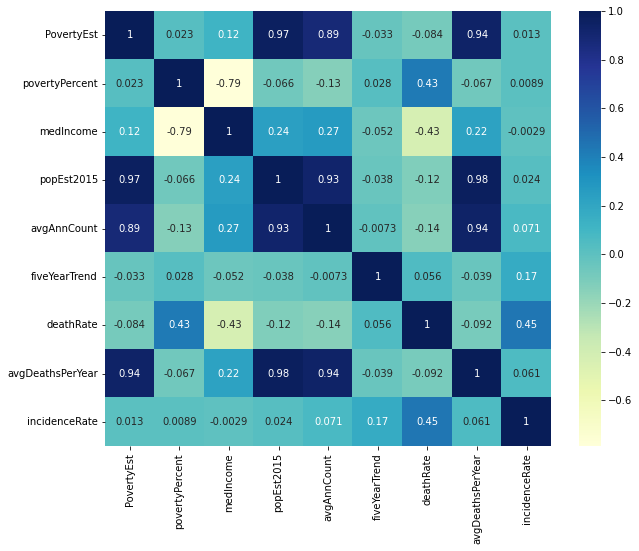

In [31]:
#displaying the heatmap
plt.figure(figsize =(10, 8))
sns.heatmap(cancer_df.corr(), annot=True, cmap='YlGnBu')

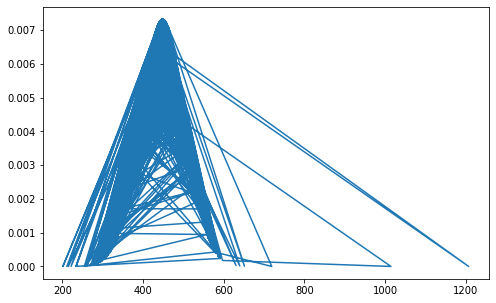

In [32]:
#displaying the normality plot
plt.figure(figsize =(8, 5))
mean = statistics.mean(cancer_df['incidenceRate'])
std = statistics.stdev(cancer_df['incidenceRate'])

plt.plot(cancer_df['incidenceRate'], norm.pdf(cancer_df['incidenceRate'], mean, std))
plt.show()

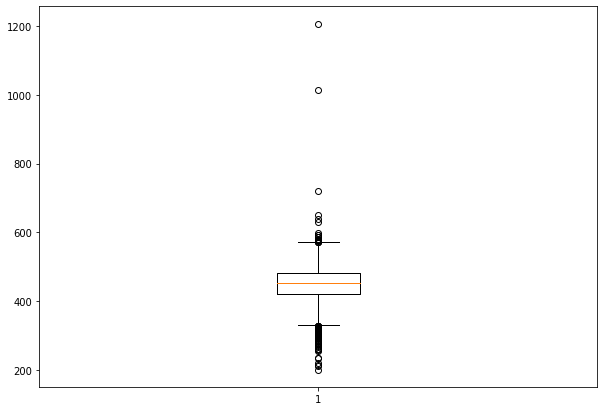

In [33]:
#displaying the boxplot for the data
plt.figure(figsize=(10, 7))

plt.boxplot(cancer_df['incidenceRate'])
plt.show()

In [34]:
#dealing with the medIncome feature

cancer_df['medIncome'].value_counts(bins=4)

(22537.004, 48388.75]    1882
(48388.75, 74137.5]      1077
(74137.5, 99886.25]       102
(99886.25, 125635.0]       11
Name: medIncome, dtype: int64

In [35]:
#creating 4 level indicators of the feature 'medIncome' to answer the required question in the assignment
median_income = pd.cut(cancer_df.medIncome, bins=[22537.004,48388.75,74137.5,99886.25,125635.0],labels = ['Very Low', 'Low', 'High', 'Very High'])
median_income

0            Low
1            Low
2       Very Low
3       Very Low
4       Very Low
          ...   
3067         Low
3068        High
3069         Low
3070         Low
3071         Low
Name: medIncome, Length: 3072, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

In [36]:
#let's look at the counts of 4 level indicators we created
median_income.value_counts()

Very Low     1882
Low          1077
High          102
Very High      11
Name: medIncome, dtype: int64

In [37]:
#one-hot encoding the 4 level indicator column that we created
new_med_income = pd.get_dummies(median_income)
new_med_income

,Very Low,Low,High,Very High
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
3067,0,1,0,0
3068,0,0,1,0
3069,0,1,0,0
3070,0,1,0,0


In [38]:
#inserting these new values to the our data in the 'med_income2' feature column
cancer_df.insert(5, 'med_income2', median_income)
cancer_df

,State,PovertyEst,povertyPercent,medIncome,Name,med_income2,popEst2015,County,avgAnnCount,recentTrend,fiveYearTrend,countyName,deathRate,avgDeathsPerYear,recTrend,incidenceRate
0,AL,7204,13.1,54366,Autauga County,Low,55347,"Autauga County, Alabama(6,10)",266.0,stable,-0.5,"Autauga County, Alabama",178.3,99,falling,475.0
1,AL,25696,13.0,49626,Baldwin County,Low,203709,"Baldwin County, Alabama(6,10)",1072.0,stable,-1.3,"Baldwin County, Alabama",174.3,424,falling,454.6
2,AL,5943,25.4,34971,Barbour County,Very Low,26489,"Barbour County, Alabama(6,10)",155.0,stable,-1.4,"Barbour County, Alabama",192.7,62,falling,477.5
3,AL,3666,18.1,39546,Bibb County,Very Low,22583,"Bibb County, Alabama(6,10)",125.0,stable,3.3,"Bibb County, Alabama",212.4,53,stable,494.6
4,AL,10000,17.5,45567,Blount County,Very Low,57673,"Blount County, Alabama(6,10)",291.0,stable,-1.7,"Blount County, Alabama",175.4,120,falling,429.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,WY,4346,9.8,72604,Sweetwater County,Low,44626,"Sweetwater County, Wyoming(6,10)",155.0,stable,1.9,"Sweetwater County, Wyoming",141.1,49,stable,403.5
3068,WY,1751,7.7,75348,Teton County,High,23125,"Teton County, Wyoming(6,10)",83.0,stable,-6.6,"Teton County, Wyoming",136.9,23,falling,402.7
3069,WY,2081,10.0,56800,Uinta County,Low,20822,"Uinta County, Wyoming(6,10)",68.0,stable,4.1,"Uinta County, Wyoming",132.8,24,falling,359.3
3070,WY,1030,12.6,50802,Washakie County,Low,8328,"Washakie County, Wyoming(6,10)",50.0,stable,-3.8,"Washakie County, Wyoming",182.3,21,stable,448.0


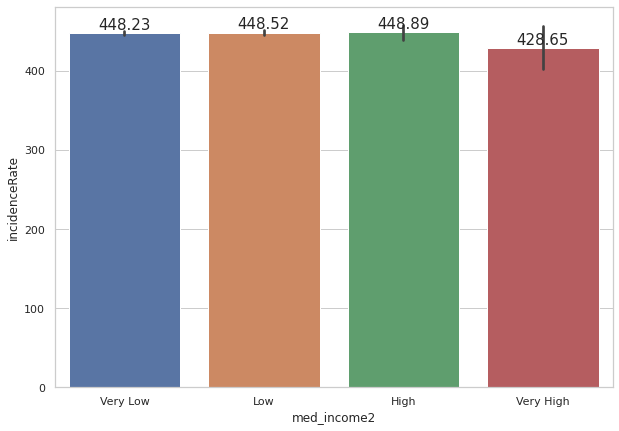

In [39]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
plot = sns.barplot(x="med_income2", y="incidenceRate", data=cancer_df)

for bar in plot.patches:
  plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [41]:
 #Sepearting categorical and numeric data
df_numerical_features = cancer_df.select_dtypes(include='number')
df_categorical_features = cancer_df.select_dtypes(include='category')

In [42]:
df_numerical_features.head()

,PovertyEst,povertyPercent,medIncome,popEst2015,avgAnnCount,fiveYearTrend,deathRate,avgDeathsPerYear,incidenceRate
0,7204,13.1,54366,55347,266.0,-0.5,178.3,99,475.0
1,25696,13.0,49626,203709,1072.0,-1.3,174.3,424,454.6
2,5943,25.4,34971,26489,155.0,-1.4,192.7,62,477.5
3,3666,18.1,39546,22583,125.0,3.3,212.4,53,494.6
4,10000,17.5,45567,57673,291.0,-1.7,175.4,120,429.9


In [43]:
#Seperating X and Y values
y = df_numerical_features['incidenceRate']
X = df_numerical_features.drop(['incidenceRate'], axis=1)

In [44]:
X.head()

,PovertyEst,povertyPercent,medIncome,popEst2015,avgAnnCount,fiveYearTrend,deathRate,avgDeathsPerYear
0,7204,13.1,54366,55347,266.0,-0.5,178.3,99
1,25696,13.0,49626,203709,1072.0,-1.3,174.3,424
2,5943,25.4,34971,26489,155.0,-1.4,192.7,62
3,3666,18.1,39546,22583,125.0,3.3,212.4,53
4,10000,17.5,45567,57673,291.0,-1.7,175.4,120


In [45]:
#Fitting a regression model
lr = LinearRegression().fit(X, y)
lr

LinearRegression()

In [46]:
#lr results

print(lr.coef_)

print("\n", lr.intercept_)

[-3.03224538e-05 -8.28068729e-01  6.16265779e-04 -7.44754179e-05
  9.98217900e-03  1.92895608e+00  1.07702005e+00  3.31798529e-02]

 239.5438028876948


In [47]:
#Making Predictions based on the coefficient and intercept

y_predicted = lr.predict(X)
y_predicted

array([454.86783561, 453.39734133, 446.35491549, ..., 417.06527064,
       449.97281519, 460.82403301])

In [48]:
r2_score(y, y_predicted)

0.2945482000295335

# Now, observing the correlation between the variables, we try out different combinations of variables to train our regression model.

### Training a model using variables: 'deathRate', 'medIncome', 'avgAnnCount'.



In [49]:
X_selected_one = df_numerical_features[['deathRate','medIncome', 'avgAnnCount']]
X_selected_one

,deathRate,medIncome,avgAnnCount
0,178.3,54366,266.0
1,174.3,49626,1072.0
2,192.7,34971,155.0
3,212.4,39546,125.0
4,175.4,45567,291.0
...,...,...,...
3067,141.1,72604,155.0
3068,136.9,75348,83.0
3069,132.8,56800,68.0
3070,182.3,50802,50.0


In [50]:
#Training the lr model 

lr_selected_one = LinearRegression().fit(X_selected_one, y)
lr_selected_one

LinearRegression()

In [51]:
#lr results

print(lr_selected_one.coef_)

print("\n", lr_selected_one.intercept_)

[1.08387423e+00 9.43824681e-04 3.61941310e-03]

 208.02303929759415


In [52]:
y_selected_predicted_one = lr_selected_one.predict(X_selected_one)
y_selected_predicted_one

array([453.55255171, 447.66057274, 450.45310614, ..., 405.81689954,
       453.74246425, 458.473539  ])

In [53]:
r2_score(y, y_selected_predicted_one)

0.25326827698046717

### Training a new model including the variable 'fiveYearTrend' along with the 3 variables used in the model above. 

In [ ]:
X_selected_two = df_numerical_features[['deathRate','medIncome', 'avgAnnCount', 'fiveYearTrend']]
X_selected_two

,deathRate,medIncome,avgAnnCount,fiveYearTrend
0,178.3,54366,266.0,-0.5
1,174.3,49626,1072.0,-1.3
2,192.7,34971,155.0,-1.4
3,212.4,39546,125.0,3.3
4,175.4,45567,291.0,-1.7
...,...,...,...,...
3067,141.1,72604,155.0,1.9
3068,136.9,75348,83.0,-6.6
3069,132.8,56800,68.0,4.1
3070,182.3,50802,50.0,-3.8


In [ ]:
#Training the lr model again

lr_selected_two = LinearRegression().fit(X_selected_two, y)
lr_selected_two

LinearRegression()

In [ ]:
#lr results

print(lr_selected_two.coef_)

print("\n", lr_selected_two.intercept_)

[1.07177093e+00 9.68823837e-04 3.57007475e-03 2.01800387e+00]

 211.9289355117884


In [ ]:
y_selected_predicted_two = lr_selected_two.predict(X_selected_two)
y_selected_predicted_two

array([455.63740745, 448.02117589, 450.06808878, ..., 417.80589023,
       449.04105412, 462.56450192])

In [ ]:
r2_score(y, y_selected_predicted_two)

0.2757634184165668

### Training k-neighbors regressor on the same 4 variables used in the above model: 'deathsPerYear', 'avgAnncount', 'fiveYearTrend', 'medIncome'. 

In [ ]:
#training k-neighbors regressor on the data
knr = KNeighborsRegressor().fit(X_selected_two,y)
print(knr)

KNeighborsRegressor()


In [ ]:
y_selected_predicted_knr = knr.predict(X_selected_two)

In [ ]:
r2_score(y, y_selected_predicted_knr)

0.3345204892689648

### Training a random forest regressor with the same 4 variables: 'deathsPerYear', 'avgAnncount', 'fiveYearTrend', 'medIncome'. 

In [ ]:
RFR = RandomForestRegressor().fit(X_selected_two,y)
print(RFR)

RandomForestRegressor()


In [ ]:
y_selected_predicted_rfr = RFR.predict(X_selected_two)

In [ ]:
r2_score = RFR.score(X_selected_two, y)
r2_score

0.9061111848144204